In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle

In [2]:
file_path = '549_anon_fall2023.csv'
df = pd.read_csv(file_path)
cols = len(df.columns)
print(df.columns)

Index(['aaa87f36b7ec556c2bb28276450ba647', '952a63c3c04ff1f1dfaef5275c2d076d',
       '43c8d82d21e76d47d0a40eafe413a6e2', 'b11c340bacaa7dcfdfec9d56f00fd62f',
       '1c59bd8bac16df4b2a3e78129363d01b', '899cff5b6d165bbbd46db51c0186ed33',
       '2f69412091650d9c399b76adc16cfa1d', 'id name', 'email anonymized',
       'anonymized group preference'],
      dtype='object')


In [3]:
numOfProjects = 7
columns_to_drop = ['id name']
df_dropped_multiple = df.drop(columns=columns_to_drop)

# If you want to modify the DataFrame in place, use inplace=True
df.drop(columns=columns_to_drop, inplace=True)

column_name_mapping = {
    df.columns[-2]: 'id',
    df.columns[-1]: 'friends',
}

for i in range(0, numOfProjects):
    column_name_mapping[df.columns[i]] = df.columns[i][-5:]

df.rename(columns=column_name_mapping, inplace=True)
full_ids = list(df['id'])

In [4]:
df

,ba647,d076d,3a6e2,fd62f,3d01b,6ed33,cfa1d,id,friends
0,4th,5th,7th,6th,3rd,2nd,1st,1d9eff09e4d1b560c8467538fc077640,['06b43b675a983a61fb8c5df8a6112e49']
1,1st,3rd,7th,6th,2nd,5th,4th,09a5425422227aaccb851607094b1292,['9b58f86366fbf77b95d27371240e1015']
2,4th,5th,7th,6th,3rd,2nd,1st,06b43b675a983a61fb8c5df8a6112e49,['1d9eff09e4d1b560c8467538fc077640']
3,1st,7th,3rd,7th,2nd,7th,7th,0fc4b6477eec633f4ce8f5020d2752e4,"['9406bb167d5efe3550e4eeabfedf495b', '753184bf..."
4,3rd,7th,5th,6th,4th,1st,2nd,1eb333c893c50462624c3c77e110337a,[]
5,2nd,1st,3rd,7th,4th,5th,6th,c409c9f22f324697b2b01d8452d47587,"['8c1b928d6b1abbe42a55d06ceccf13e4', 'bdf1326f..."
6,2nd,1st,3rd,5th,4th,6th,7th,bdf1326f1bcbb05c9a80dd8e78f33c10,"['8c1b928d6b1abbe42a55d06ceccf13e4', 'c409c9f2..."
7,2nd,7th,1st,6th,5th,4th,3rd,bde83e4bc84c1d84c4d5e72c27657514,['28a141a5a1b7431578dfd61c9ba9b140']
8,2nd,7th,1st,6th,5th,4th,3rd,28a141a5a1b7431578dfd61c9ba9b140,['bde83e4bc84c1d84c4d5e72c27657514']
9,1st,5th,3rd,7th,4th,6th,2nd,753184bfd49f4cdf83f45ca2a085d51f,"['ed8b98d7ade1b986d0179adf846cc7d7', '0fc4b647..."


In [5]:
projects = [p for p in list(df.columns[0:numOfProjects])]

In [6]:
c = dict()
G = nx.Graph()
nodes = []
for index, row in df.iterrows():
    id = row['id'][-5:]
    nodes.append(id)
    preferences = [int(row[p][:-2]) for p in projects]
    for p, pref in zip(projects, preferences):
        c[(id, p)] = (numOfProjects - pref + 1) / numOfProjects
    
    # friends
    friends = row['friends'].strip("[]").replace("'", "").split(",")
    for f in friends:
        if f:
            G.add_edge(id, f[-5:])
            
G.add_nodes_from(nodes)
G_c = nx.complement(G)
w = dict()
for e in G_c.edges:
    w[e] = 1
edges = list(G_c.edges)

Num of students = 21
Num of (friend) edges = 14


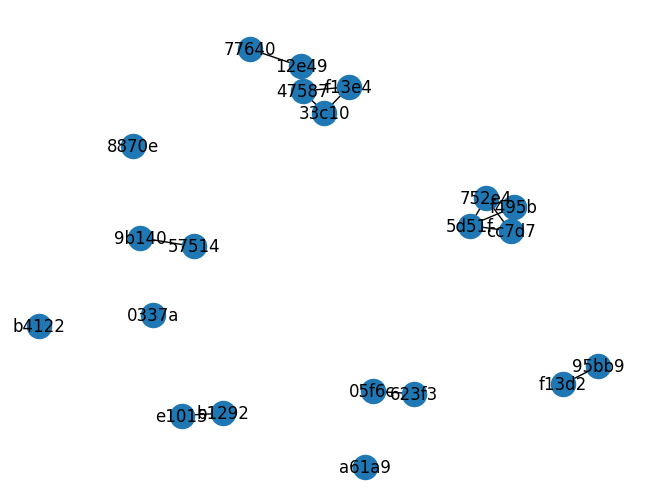

In [7]:
print(f'Num of students = {len(nodes)}')
print(f'Num of (friend) edges = {len(G.edges)}')

nx.draw(G, pos=nx.spring_layout(G, k=0.2, iterations=20), with_labels=True)

In [8]:
max_capacities = dict()
for p in projects:
    max_capacities[p] = 4

In [9]:
with open(f'./cs549.pickle', 'wb') as file:
    pickle.dump(projects, file) # project names
    pickle.dump(max_capacities, file) # max capacity for each project
    pickle.dump(c, file) # project preferences
    pickle.dump(w, file) # weights of conflict edges
    pickle.dump(edges, file) # conflict edges
    pickle.dump(full_ids, file) # full emails
    file.close()